# Volatility Model
This model predicts volatility of an underlying security over a one month rolling window using a proprietary technique. You can use volatility data in a variety of ways, when combined with indication of market direction, to choose when to enter or exit a position.

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
#sys.path.append("../")
import paxdk.PaxFinancialAPI

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.2.0
Eager execution: True


# Plot Historical data, seeing how the model performs

In [7]:
import sys
#sys.path.append("../")
import paxdk.PaxFinancialAPI
import datetime
import pandas as pd
 
import json
with open("../.config") as f:
    data = json.load(f)
api_key = data['api_key']

pq = paxdk.PaxFinancialAPI.PaxFinancialAPI(url_version='dev',api_key=api_key)

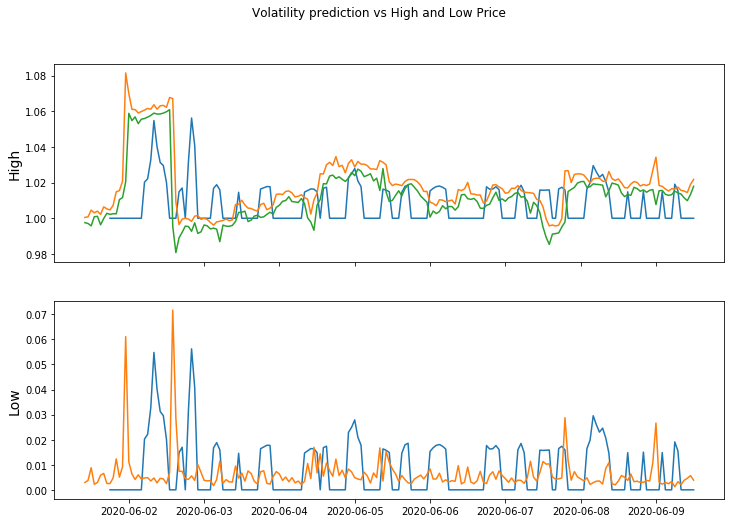

In [16]:
predictions = pq.model({'api_key':api_key,
                'time_in':datetime.datetime(2020,6,1,5),
                'time_end':datetime.datetime(2020,6,9,12),
                'Ticker':'BTCUSDT',
                'model_id':'volume_alpha',
                'version_id':'default'},remote=True)

#print(predictions)
dfModel = pd.DataFrame(predictions['model'])

bars = pq.get_historical_hour({'api_key':api_key,
                                'time_in':datetime.datetime(2020,6,1,10),
                                'time_end':datetime.datetime(2020,6,9,12),
                                'Ticker':'BTCUSDT',
                                                             },remote=True)
dfBars = pd.DataFrame(bars)
#display(dfBars)

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Volatility prediction vs High and Low Price')

axes[0].set_ylabel("High", fontsize=14)
axes[0].plot(dfModel['DateTime'],dfModel['model']*0.02+1)
axes[0].plot(dfBars['DateTime'],dfBars['HighPrice']/dfBars['OpenPrice'].iloc[0])
axes[0].plot(dfBars['DateTime'],dfBars['LowPrice']/dfBars['OpenPrice'].iloc[0])


axes[1].set_ylabel("Low", fontsize=14)
axes[1].plot(dfModel['DateTime'],dfModel['model']*0.02)
axes[1].plot(dfBars['DateTime'],dfBars['HighPrice']/dfBars['OpenPrice'].iloc[0] - dfBars['LowPrice']/dfBars['OpenPrice'].iloc[0])

plt.show()
